        Fruit   Color  Weight (g)   Taste
0      Orange     Red         300    Sour
1       Apple     Red         100   Sweet
2  Strawberry  Orange         300    Sour
3  Strawberry  Purple         100  Bitter
4      Grapes  Yellow         200  Bitter
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fruit       50 non-null     object
 1   Color       50 non-null     object
 2   Weight (g)  50 non-null     int64 
 3   Taste       50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None

Classification Report:
              precision    recall  f1-score   support

       Apple       0.33      0.50      0.40         2
      Banana       0.00      0.00      0.00         3
      Grapes       0.00      0.00      0.00         2
      Orange       0.25      0.50      0.33         2
  Strawberry       0.00      0.00      0.00         1

 

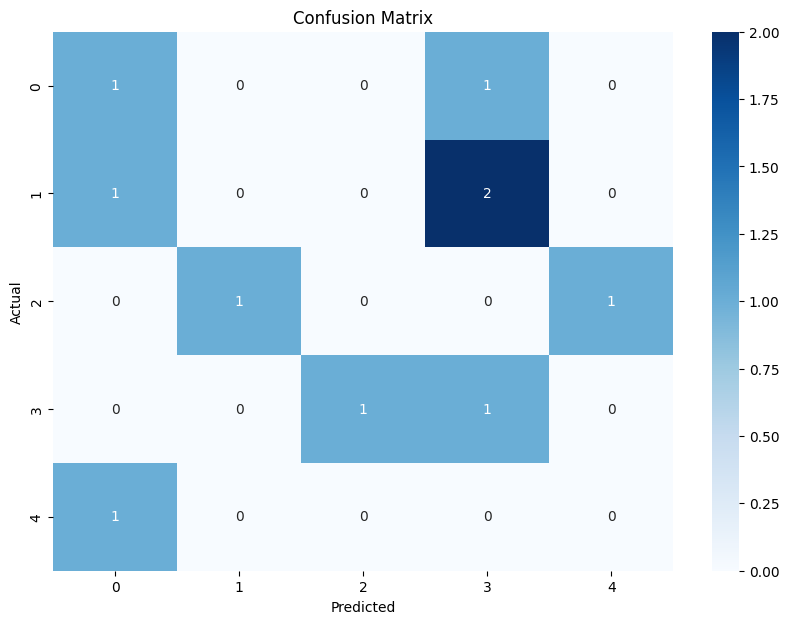


Feature Importance:
      feature  importance
0       Color    0.442372
1  Weight (g)    0.326026
2       Taste    0.231603


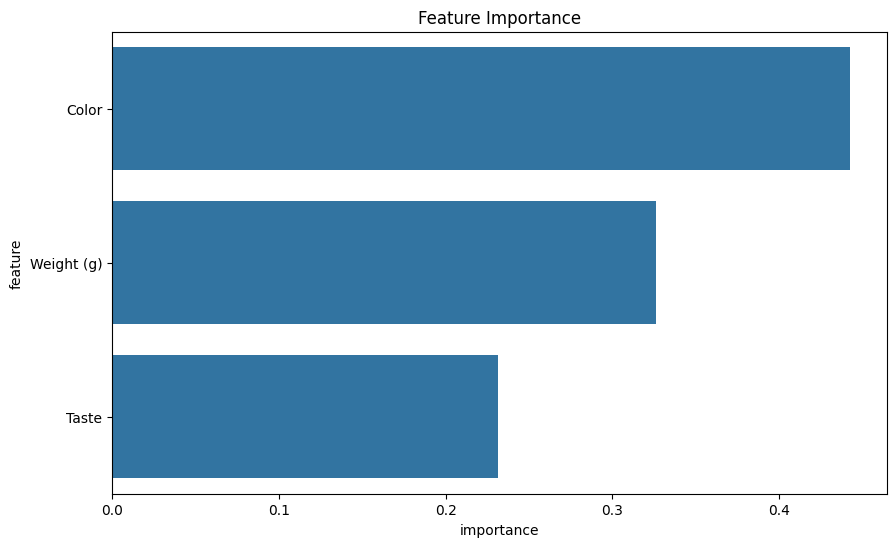


Prediction for example [Color=1, Weight=150g, Taste=2]: Orange


c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('fruits_dataset.csv')

# Print the first few rows and basic information about the dataset
print(df.head())
print(df.info())

# Encode categorical variables
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])
df['Taste'] = le.fit_transform(df['Taste'])

# Separate features and target
X = df[['Color', 'Weight (g)', 'Taste']]
y = df['Fruit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Example prediction
example = [[1, 150, 2]]  # Example: [Color (encoded), Weight, Taste (encoded)]
prediction = rf_model.predict(example)
print(f"\nPrediction for example [Color=1, Weight=150g, Taste=2]: {prediction[0]}")